# 선형 SVM 분류

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64) # Iris-Viginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge"))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# 비선형 SVM 분류

## PolynomialFeatures를 포함한 Pipeline

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 10, loss = "hinge"))
])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge'))])

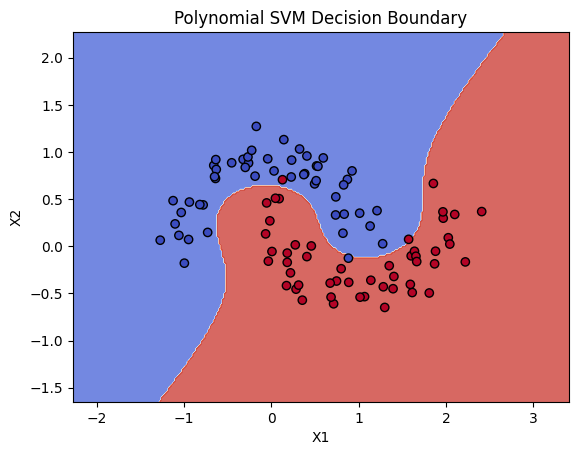

In [11]:
import matplotlib.pyplot as plt

# 결정 경계를 그리기 위한 함수 정의
def plot_decision_boundary(model, X, y):
    h = .02  # meshgrid의 스탭 크기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8) # contourf를 사용하여 채워진 등고선 플롯을 생성합니다. 모델에 의해 예측된 결정 경계를 시각화합니다.
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("Polynomial SVM Decision Boundary")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# 결정 경계를 그림
plot_decision_boundary(polynomial_svm_clf, X, y)

## 다항식 커널

In [13]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1,C = 5))
])
# coef0: 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=5, coef0=1, kernel='poly'))])

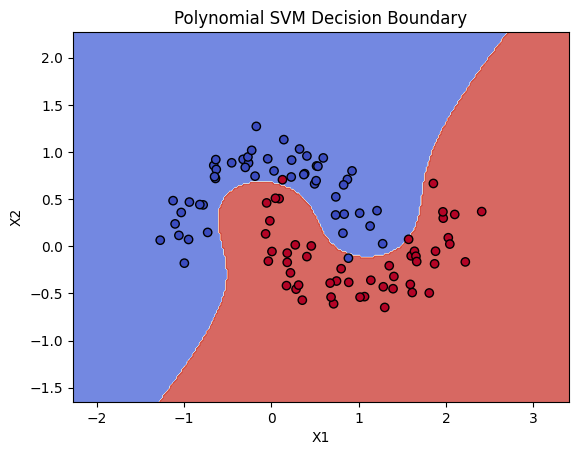

In [14]:
# 결정 경계를 그림
plot_decision_boundary(poly_kernel_svm_clf, X, y)

In [17]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 10, coef0 = 100, C = 5))
])
# coef0: 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

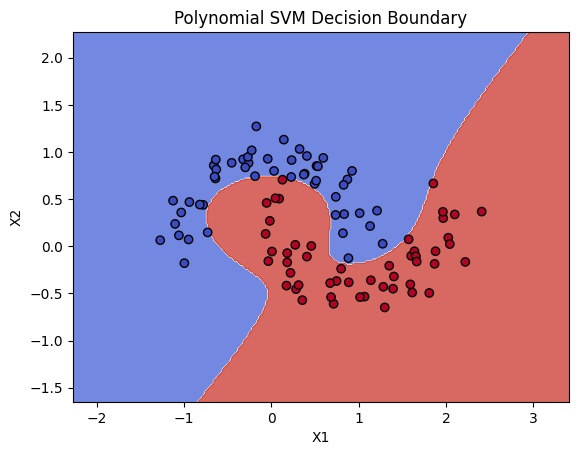

In [18]:
# 결정 경계를 그림
plot_decision_boundary(poly_kernel_svm_clf, X, y)

## 가우시안 RBF 커널
### 훈련 세트가 너무 크지 않다면 사용하기 좋음

In [19]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

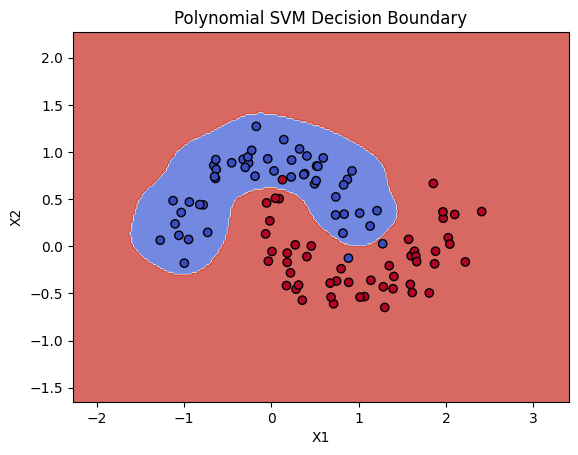

In [20]:
# 결정 경계를 그림
plot_decision_boundary(rbf_kernel_svm_clf, X, y)

# SVM 회귀

In [21]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [23]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = "poly", degree = 2, C = 100, epsilon = 0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')